# Clase 19

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32,shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    z = w*x + b
    init = tf.global_variables_initializer()
with tf.Session(graph=g) as sess:
    sess.run(init)
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'%(t, sess.run(z, feed_dict={x:t})))

Instructions for updating:
non-resource variables are not supported in the long term
x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [2]:
with tf.Session(graph=g) as sess:
    sess.run(init)
    print(sess.run(z, feed_dict={x:[1., 0.6, -1.8]}))

[ 2.7        1.9000001 -2.8999999]


In [3]:
import numpy as np
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=(None, 2, 3), name='input_x')
    x2 = tf.reshape(x, shape=(-1, 6),name='x2')
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')
with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)
    print('input shape: ', x_array.shape)
    print('Reshaped:\n', sess.run(x2, feed_dict={x:x_array}))
    print('Column Sums:\n', sess.run(xsum, feed_dict={x:x_array}))
    print('Column Means:\n', sess.run(xmean, feed_dict={x:x_array}))

input shape:  (3, 2, 3)
Reshaped:
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:
 [18. 21. 24. 27. 30. 33.]
Column Means:
 [ 6.  7.  8.  9. 10. 11.]


In [4]:
class TfLinreg(object):
    def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        with self.g.as_default():
            tf.set_random_seed(random_seed)
            self.build()
            self.init_op = tf.global_variables_initializer()
    def build(self):
        self.X = tf.placeholder(dtype=tf.float32,shape=(None, self.x_dim),name='x_input')
        self.y = tf.placeholder(dtype=tf.float32,shape=(None),name='y_input')
        print(self.X)
        print(self.y)
        w = tf.Variable(tf.zeros(shape=(1)),name='weight')
        b = tf.Variable(tf.zeros(shape=(1)),name="bias")
        print(w)
        print(b)
        self.z_net = tf.squeeze(w*self.X + b,name='z_net')
        print(self.z_net)
        sqr_errors = tf.square(self.y - self.z_net,name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors,name='mean_cost')
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate, name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)
    
    

In [5]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,2.0, 5.0, 6.3, 6.6, 7.4, 8.0,9.0])

In [6]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    sess.run(model.init_op)
    training_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.X:X_train, model.y:y_train})
        training_costs.append(cost)
    return training_costs

In [7]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [8]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

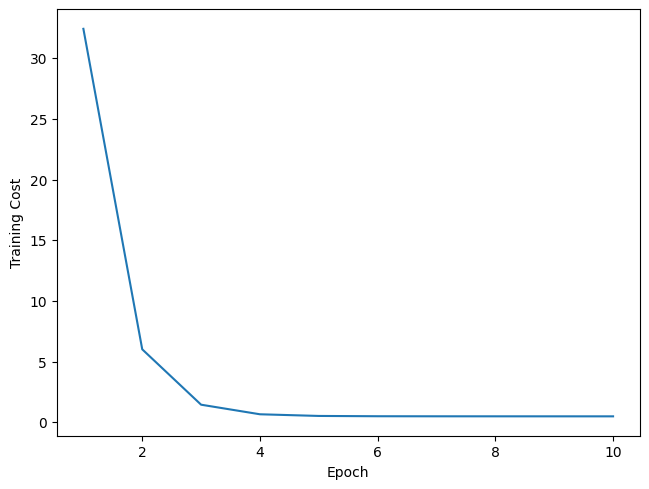

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
#plt.savefig('images/13_01.png', dpi=300)
plt.show()

In [10]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, feed_dict={model.X:X_test})
    return y_pred

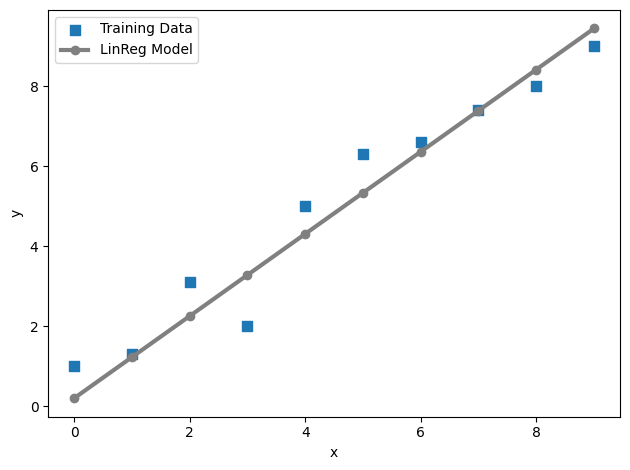

In [11]:
plt.scatter(X_train, y_train,
marker='s', s=50,
label='Training Data')
plt.plot(range(X_train.shape[0]),
predict_linreg(sess, lrmodel, X_train),
color='gray', marker='o',
markersize=6, linewidth=3,
label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
#plt.savefig('images/13_02.png')
plt.show()

In [12]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_size = X_train.shape[1]
input_size = image_size * image_size
X_train = np.reshape(X_train, [-1, input_size])
X_test = np.reshape(X_test, [-1, input_size])
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)
X_train_centered = (X_train - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val
del X_train, X_test
print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [13]:
n_features = X_train_centered.shape[1]
n_classes = 10
random_seed = 123
np.random.seed(random_seed)
g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    tf_x = tf.placeholder(dtype=tf.float32,shape=(None, n_features),name='tf_x')
    tf_y = tf.placeholder(dtype=tf.int32, shape=None, name='tf_y')
    y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
    h1 = tf.layers.dense(inputs=tf_x, units=50,activation=tf.tanh,name='layer1')
    h2 = tf.layers.dense(inputs=h1, units=50,activation=tf.tanh,name='layer2')
    logits = tf.layers.dense(inputs=h2,units=10,activation=None,name='layer3')
    predictions = {'classes' : tf.argmax(logits,axis=1,name='predicted_classes'),
    'probabilities' : tf.nn.softmax(logits,name='softmax_tensor')}

C:\Users\acer\AppData\Local\Temp\ipykernel_3248\838117074.py:11: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  h1 = tf.layers.dense(inputs=tf_x, units=50,activation=tf.tanh,name='layer1')
C:\Users\acer\AppData\Local\Temp\ipykernel_3248\838117074.py:12: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  h2 = tf.layers.dense(inputs=h1, units=50,activation=tf.tanh,name='layer2')
C:\Users\acer\AppData\Local\Temp\ipykernel_3248\838117074.py:13: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.layers.dense(inputs=h2,units=10,activation=None,name='layer3')


In [14]:
with g.as_default():
    cost = tf.losses.softmax_cross_entropy(onehot_labels=y_onehot,logits=logits)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(loss=cost)
    init_op = tf.global_variables_initializer()

In [15]:
def create_batch_generator(X, y, batch_size=128, shuffle=False):
    X_copy = np.array(X)
    y_copy = np.array(y)
    if shuffle:
        data = np.column_stack((X_copy, y_copy))
        np.random.shuffle(data)
        X_copy = data[:, :-1]
        y_copy = data[:, -1].astype(int)
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], y_copy[i:i+batch_size])



In [16]:
sess = tf.Session(graph=g)
sess.run(init_op)
training_costs = []
for epoch in range(50):
    training_loss = []
    batch_generator = create_batch_generator(X_train_centered, y_train,batch_size=64)
    for batch_X, batch_y in batch_generator:
        feed = {tf_x:batch_X, tf_y:batch_y}
        _, batch_cost = sess.run([train_op, cost],feed_dict=feed)
        training_costs.append(batch_cost)
    print(' -- Epoch %2d '
        'Avg. Training Loss: %.4f' % (epoch+1, np.mean(training_costs)))

 -- Epoch  1 Avg. Training Loss: 1.5841
 -- Epoch  2 Avg. Training Loss: 1.2739
 -- Epoch  3 Avg. Training Loss: 1.1002
 -- Epoch  4 Avg. Training Loss: 0.9846
 -- Epoch  5 Avg. Training Loss: 0.9005
 -- Epoch  6 Avg. Training Loss: 0.8360
 -- Epoch  7 Avg. Training Loss: 0.7845
 -- Epoch  8 Avg. Training Loss: 0.7422
 -- Epoch  9 Avg. Training Loss: 0.7067
 -- Epoch 10 Avg. Training Loss: 0.6764
 -- Epoch 11 Avg. Training Loss: 0.6501
 -- Epoch 12 Avg. Training Loss: 0.6271
 -- Epoch 13 Avg. Training Loss: 0.6066
 -- Epoch 14 Avg. Training Loss: 0.5884


KeyboardInterrupt: 

In [38]:
feed = {tf_x : X_test_centered}
y_pred = sess.run(predictions['classes'],feed_dict=feed)
print('Test Accuracy: %.2f%%' % (100*np.sum(y_pred == y_test)/y_test.shape[0]))

Test Accuracy: 93.67%


In [30]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])
def net_input(X, w):
    return np.dot(X, w)
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)
print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [31]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
[0.2, 0.4, 1.0, 0.2],
[0.6, 1.5, 1.2, 0.7]])
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)
print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


In [32]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' % y_class)

Predicted class label: 0


In [34]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [35]:
np.sum(y_probas)

1.0

In [36]:
def relu(z):
    return np.maximum(z, 0.)
y_relu = relu(Z)
print(Z)
print(y_relu)

[1.78 0.76 1.65]
[1.78 0.76 1.65]


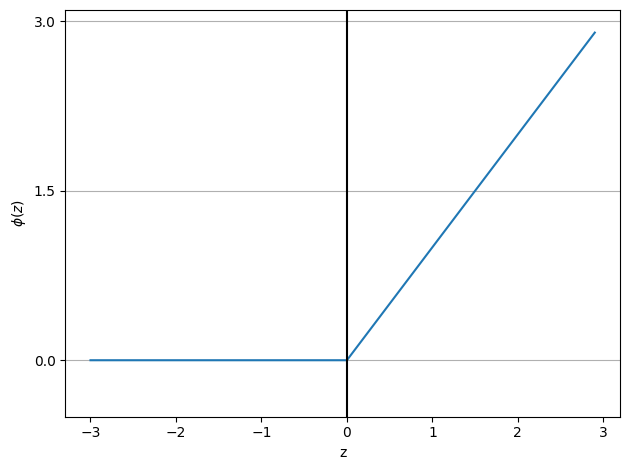

In [37]:
z = np.arange(-3, 3, 0.1)
phi_z = relu(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.5, 3.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.,1.5,3.])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()